# Stock Price Prediction using LSTM model

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

## Setting up Time span of the dataset 

### Note: As we are web scrapping data from the Stooq finance portal, we have limited stock tickers that we can predict. To know which tickers are available visit https://stooq.com/t/

In [2]:
# Data of 2010 to 2023(August)

start='2010-01-01'
end='2023-09-01'

# WebScrapping data from yahoo finance

df=data.DataReader('AAPL','stooq',start,end)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-09-01,189.485,189.92,188.280,189.46,45766503.0
2023-08-31,187.840,189.12,187.480,187.87,60794467.0
2023-08-30,184.940,187.85,184.740,187.65,60813888.0
2023-08-29,179.695,184.90,179.500,184.12,53003948.0
2023-08-28,180.090,180.59,178.545,180.19,43820697.0


In [3]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2023-09-01,189.485,189.92,188.280,189.46,45766503.0
1,2023-08-31,187.840,189.12,187.480,187.87,60794467.0
2,2023-08-30,184.940,187.85,184.740,187.65,60813888.0
3,2023-08-29,179.695,184.90,179.500,184.12,53003948.0
4,2023-08-28,180.090,180.59,178.545,180.19,43820697.0


### Plotting closing prices

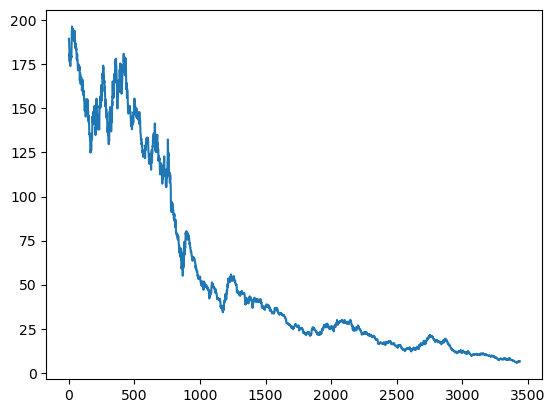

In [4]:
plt.plot(df.Close)

### Calculating and Plotting Mean Average of 100 days

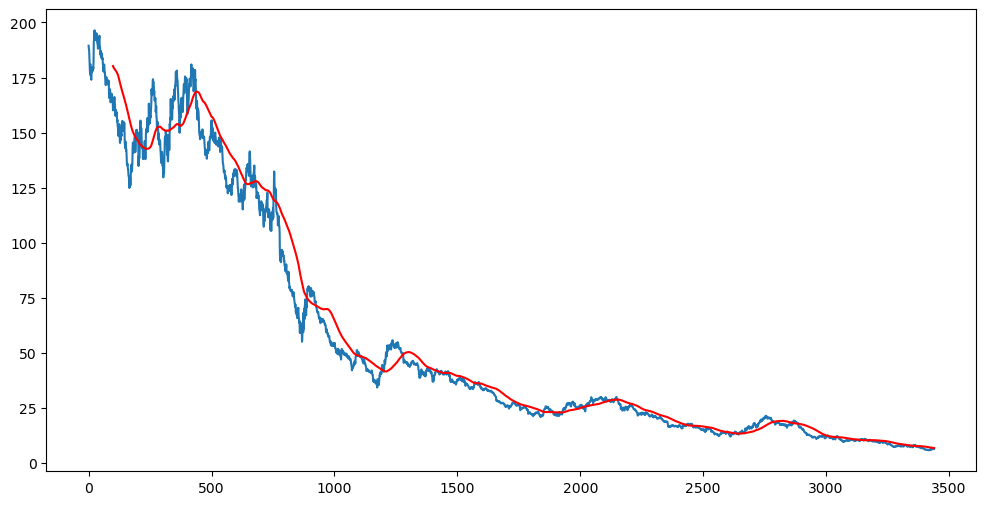

In [5]:
ma100=df.Close.rolling(100).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

### Calculating and Plotting Mean Average of 200 days and 100 days

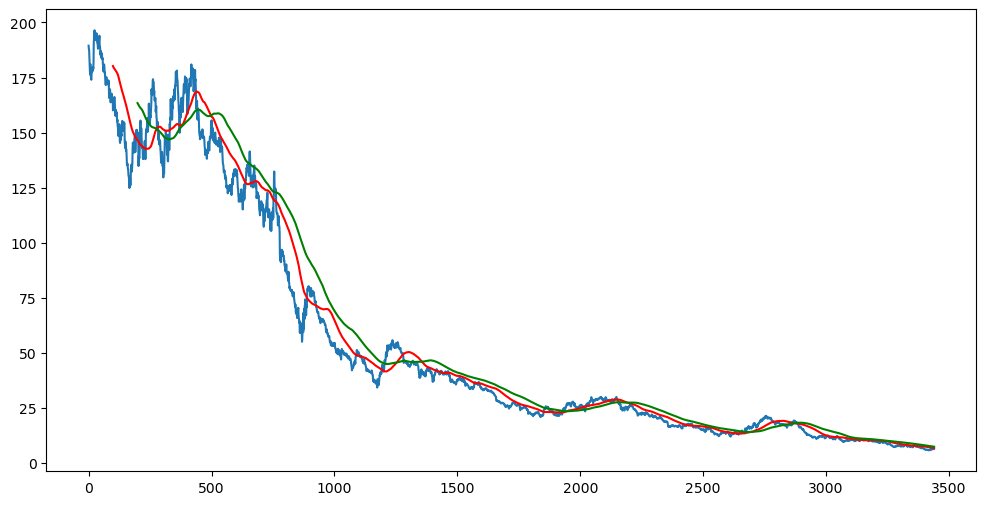

In [6]:
ma200=df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

## Train and Testing dataframes

In [7]:
#Train And Testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print (data_training.shape)
print (data_testing.shape)

(2408, 1)
(1032, 1)


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [9]:
data_training_array=scaler.fit_transform(data_training)

In [10]:
x_train=[]
y_train=[]

for i in range (100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)    

In [11]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [12]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences= True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [14]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
73/73 [==============================] - 17s 180ms/step - loss: 0.0281
Epoch 2/50
73/73 [==============================] - 13s 184ms/step - loss: 0.0059
Epoch 3/50
73/73 [==============================] - 13s 183ms/step - loss: 0.0053
Epoch 4/50
73/73 [==============================] - 14s 194ms/step - loss: 0.0045
Epoch 5/50
73/73 [==============================] - 13s 178ms/step - loss: 0.0047
Epoch 6/50
73/73 [==============================] - 13s 183ms/step - loss: 0.0038
Epoch 7/50
73/73 [==============================] - 14s 188ms/step - loss: 0.0048
Epoch 8/50
73/73 [==============================] - 13s 182ms/step - loss: 0.0044
Epoch 9/50
73/73 [==============================] - 14s 192ms/step - loss: 0.0032
Epoch 10/50
73/73 [==============================] - 13s 181ms/step - loss: 0.0034
Epoch 11/50
73/73 [==============================] - 14s 198ms/step - loss: 0.0032
Epoch 12/50
73/73 [==============================] - 15s 199ms/step - loss: 0.0035
Epoch 13/50
7

In [15]:
model.save('keras_model.h5')

C:\Users\Arighna\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
past_100_days= data_training.tail(100)
final_df = past_100_days.append(data_testing,ignore_index= True)

final_df.head()

C:\Users\Arighna\AppData\Local\Temp\ipykernel_8404\218077465.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index= True)


,Close
0,20.8424
1,20.8504
2,20.7188
3,20.5085
4,20.2652


In [17]:
input_data= scaler.fit_transform(final_df)

In [18]:
x_test= []
y_test=[]

for i in range (100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])
    
x_test, y_test = np.array(x_test), np.array(y_test)

In [19]:
# Making Predictions


y_predicted = model.predict(x_test)

33/33 [==============================] - 3s 59ms/step


In [20]:
scaler.scale_
scale_factor =1/scaler.scale_

In [21]:
y_predicted=y_predicted * scale_factor
y_test=y_test * scale_factor

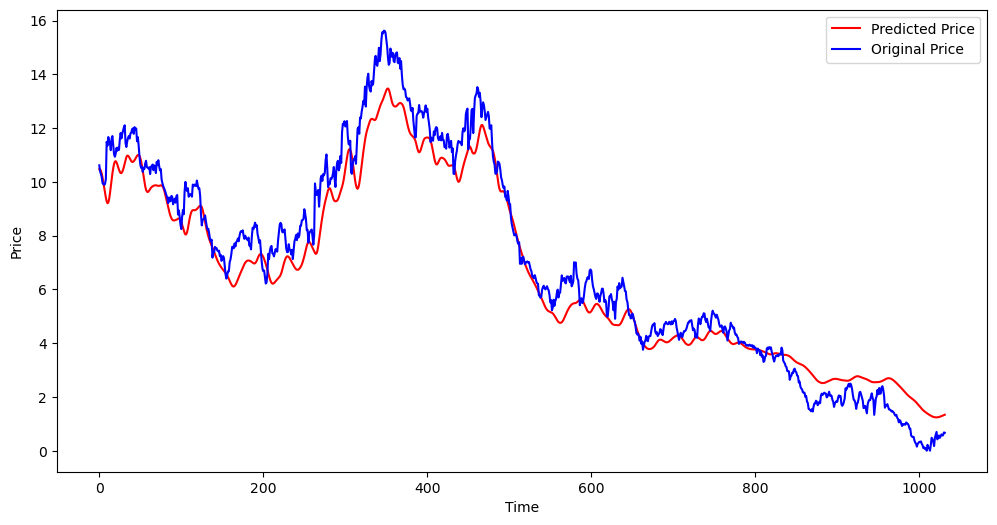

In [22]:
plt.figure(figsize=(12,6))
plt.plot(y_predicted,'r', label='Predicted Price')
plt.plot(y_test,'b', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# To run the model on the dataset run the streamlit app (app.py)

## Run the following command on the command prompt
## streamlit run app.py  